In [1]:
import numpy as np
import scipy.signal as signal
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Parametros do sistema

In [2]:
g = 9.81
a1 = 0.02
a2 = 0.05
A1 = 0.5
A2 = 2.0

## Caracteristicas do sistema

In [3]:
u_bar = 1
h1_bar = u_bar**2 / (2 * g * a1**2)
h2_bar = u_bar**2 / (2 * g * a2**2)
x_bar = np.array([h1_bar, h2_bar])

## Matriz do sistema linearizado

In [4]:
A_matrix = np.array([[-0.015696, 0], [0.003924, -0.024525]])
B_matrix = np.array([[2], [0]])
C_matrix = np.array([[0, 1]])
D_matrix = np.array([[0]])

## Sistema linear criado apartir do espaço de estado

In [5]:
linear_system = signal.StateSpace(A_matrix, B_matrix, C_matrix, D_matrix)

## Sistema não linear

In [6]:
def nonlinear_system_ode(t, x):
    h1, h2 = x
    dh1_dt = (1/A1) * (u_bar - a1 * np.sqrt(2 * g * h1))
    dh2_dt = (1/A2) * (a1 * np.sqrt(2 * g * h1) - a2 * np.sqrt(2 * g * h2))
    return [dh1_dt, dh2_dt]

In [7]:
x0_nonlinear = [0, 0]
t_span = [0, 1000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

## Solução do sistema não linear

In [8]:
sol_nonlinear = solve_ivp(
    fun=nonlinear_system_ode,
    t_span=t_span,
    y0=x0_nonlinear,
    t_eval=t_eval
)

/var/folders/sy/j6l_08910835cxx2ps1dll240000gn/T/ipykernel_31753/1590656113.py:4: RuntimeWarning: invalid value encountered in sqrt
  dh2_dt = (1/A2) * (a1 * np.sqrt(2 * g * h1) - a2 * np.sqrt(2 * g * h2))


In [9]:
h2_nonlinear = sol_nonlinear.y[1]

In [10]:
delta_x0 = x0_nonlinear - x_bar

In [11]:
t_linear, delta_y, delta_x_out = signal.lsim(
    linear_system,
    U=np.zeros_like(t_eval),
    T=t_eval,
    X0=delta_x0
)

/Users/cleitonmoreira/miniconda3/lib/python3.12/site-packages/scipy/signal/_ltisys.py:1917: RuntimeWarning: divide by zero encountered in matmul
  yout = squeeze(xout @ C.T)
/Users/cleitonmoreira/miniconda3/lib/python3.12/site-packages/scipy/signal/_ltisys.py:1917: RuntimeWarning: overflow encountered in matmul
  yout = squeeze(xout @ C.T)
/Users/cleitonmoreira/miniconda3/lib/python3.12/site-packages/scipy/signal/_ltisys.py:1917: RuntimeWarning: invalid value encountered in matmul
  yout = squeeze(xout @ C.T)


In [12]:
h2_linear = h2_bar + delta_y

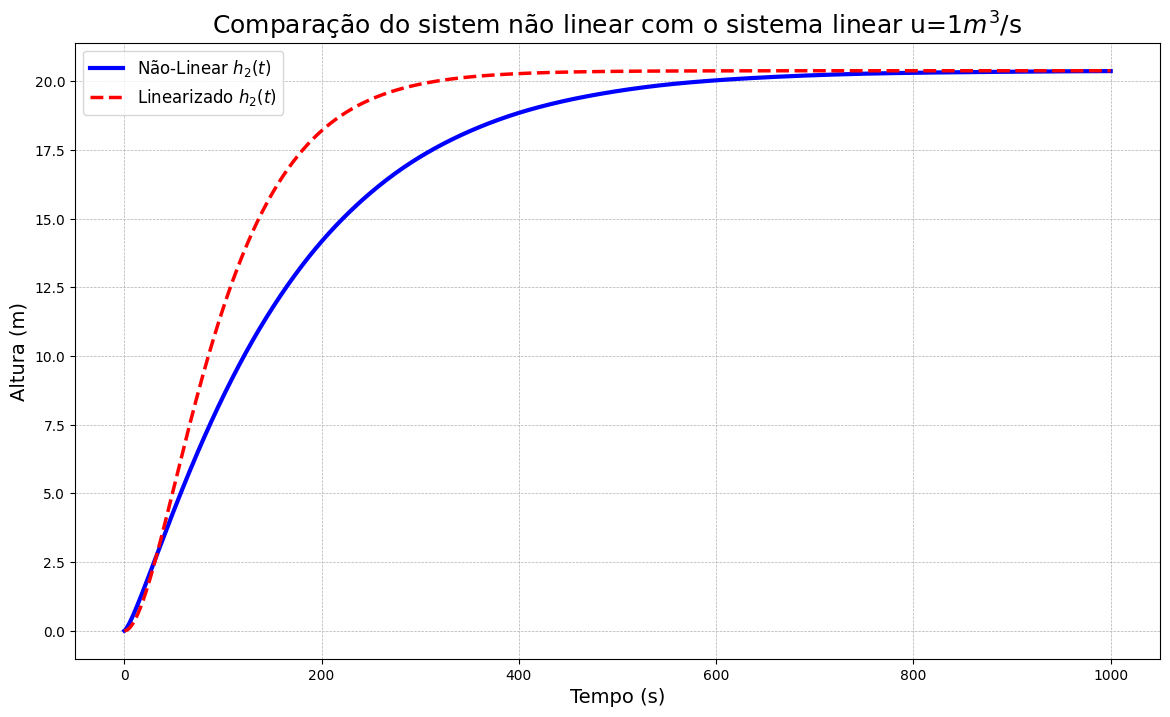

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(t_eval, h2_nonlinear, label='Não-Linear $h_2(t)$', color='blue', linewidth=3)
plt.plot(t_linear, h2_linear, label='Linearizado $h_2(t)$', color='red', linestyle='--', linewidth=2.5)
plt.title('Comparação do sistem não linear com o sistema linear u=1$m^3/$s', fontsize=18)
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Altura (m)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### A equação linear é calculada usando como base pontos de equilíbrio que calculamos, mas para calcular esses pontos nos definimos um u=0.5. Então a medida que nos variamos o valor da entrada do degrau nosso sistema fica mais preciso quanto mais perto do valor u(t) usado para calcular o ponto de equilíbrio.